In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.rcParams['figure.figsize'] = [16, 10]

In [2]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../telperion')
from SapWood import SapWood

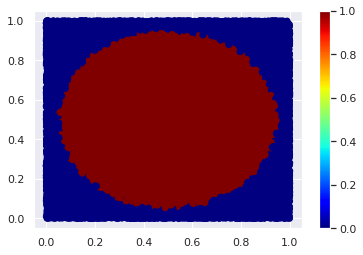

In [3]:
x = np.random.uniform(low=0, high=1, size=(50000,5))
y = np.array([1 if (j-0.5)**2 + (i-0.5)**2 < 0.2 else 0 for i, j in zip(x[:,0],x[:,1])])
# y = np.round(x[:,0])

plt.scatter(x[:,0],x[:,1], c=y, cmap='jet')
plt.colorbar()

In [4]:
sw = SapWood(x.shape[1])

sw.fit(x, y)

E: 50 | L: 3.932651 | A: 0.00: 100%|██████████| 50/50 [00:01<00:00, 29.71it/s]
E: 50 | L: 3.666892 | A: 0.00: 100%|██████████| 50/50 [00:01<00:00, 30.57it/s]
E: 50 | L: 3.449622 | A: 0.00: 100%|██████████| 50/50 [00:01<00:00, 31.34it/s]
E: 50 | L: 3.317472 | A: 0.00: 100%|██████████| 50/50 [00:01<00:00, 30.78it/s]
E: 50 | L: 3.415918 | A: 0.00: 100%|██████████| 50/50 [00:01<00:00, 32.07it/s]


In [5]:
from HeartWood import HeartWood

hw = HeartWood(x.shape[1])
hw.fit(x, y)

E: 50 | L: 0.234591 | A: 62.45: 100%|██████████| 50/50 [00:01<00:00, 39.67it/s]


In [6]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
x = data['data']
y = data['target']

In [7]:
sw = SapWood(x.shape[1])

sw.fit(x, y)

  0%|          | 0/50 [00:00<?, ?it/s]/home/jfilipe/GitHub/Telperion/notebooks/../telperion/HeartWood.py:43: RuntimeWarning: overflow encountered in cosh
  return 0.5/(np.cosh(x)**2)
/home/jfilipe/GitHub/Telperion/notebooks/../telperion/HeartWood.py:43: RuntimeWarning: overflow encountered in square
  return 0.5/(np.cosh(x)**2)
E: 50 | L: 4.212114 | A: 0.00: 100%|██████████| 50/50 [00:00<00:00, 1027.76it/s]
E: 50 | L: 5.332625 | A: 0.00: 100%|██████████| 50/50 [00:00<00:00, 1224.36it/s]
E: 50 | L: 5.826805 | A: 0.00: 100%|██████████| 50/50 [00:00<00:00, 1111.35it/s]
E: 50 | L: 7.354553 | A: 0.00: 100%|██████████| 50/50 [00:00<00:00, 1138.11it/s]
E: 50 | L: 6.773481 | A: 0.00: 100%|██████████| 50/50 [00:00<00:00, 1096.13it/s]


In [8]:
from HeartWood import HeartWood

hw = HeartWood(x.shape[1])
hw.fit(x, y)

E: 50 | L: 0.641502 | A: 35.85: 100%|██████████| 50/50 [00:00<00:00, 1047.96it/s]
